
##**<center>Assessment CLO-3 Project Team Based**

<center>
CLO-3 Learning: Seleksi Model, Decision Tree, kNN, Naïve Bayes <br>
MK - Pengantar Kecerdasan Buatan dan Sistem Cerdas <br>
Fakultas Informatika – Universitas Telkom <br>

</center>




**Impor library dan memasukkan dataset**

Impor library untuk melakukan perhitungan ataupun membuat algoritma nanti

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns
import matplotlib.pyplot as lib
#to avoid writing plot.show
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

Memasukkan dataset ke dalam program untuk diolah

In [4]:
from google.colab import files
uploaded = files.upload()

Saving arrhythmia1.csv to arrhythmia1.csv


**Membuka dan membaca dataset**

In [5]:
# Baca dataset
df = pd.read_csv('arrhythmia1.csv', header=None)

Menampilan beberapa baris pertama pad dataset menggunakan .head()

In [333]:
# Tampilkan beberapa baris pertama dari dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


Menampilan beberapa baris terakhir pada dataset menggunakan .tail()

In [6]:
# Tampilkan beberapa baris akhir dari dataset
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


Menampilkan jumlah kolom dan baris yang ada pada dataset

In [7]:
# Tampilkan berapa banyak kolom dan baris pada dataset
df.shape

(452, 280)

**Melihat metadata**

In [8]:
# Melihat metadata dari data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [9]:
#statistik data frame
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000




#**1.   Pre-Processing**



**Mencari nilai NIL dalam dataset**

Mencari total nilai NIl pada dataset

In [10]:
# Menghitung jumlah total nilai NIL
pd.isnull(df).sum().sum()

0

In [11]:
# Mengganti NIL atau (?) dengan np.nan value
df = df.replace('?', np.NaN)

In [12]:
# Total hitungan akhir dari NIL value pada dataset
nv = pd.isnull(df).sum().sum()
nv

408

**Mencari di mana nilai NIL dengan memvisualisasikannya agar mudah dihapus**

Text(0, 0.5, 'Banyaknya NIL di setiap kolom pada tabel')

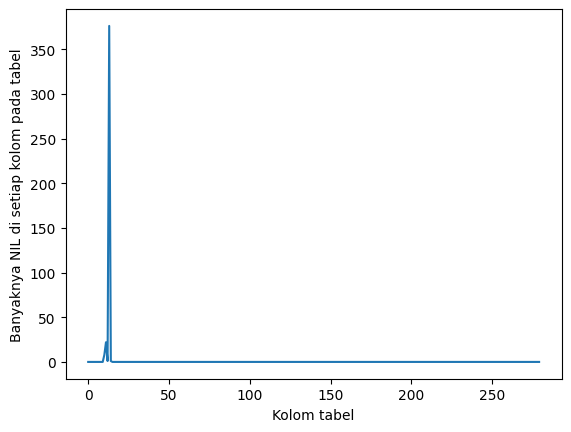

In [13]:
pd.isnull(df).sum().plot()
lib.xlabel('Kolom tabel')
lib.ylabel('Banyaknya NIL di setiap kolom pada tabel')

Text(0, 0.5, 'Jumlah total nilai NIL di setiap kolom')

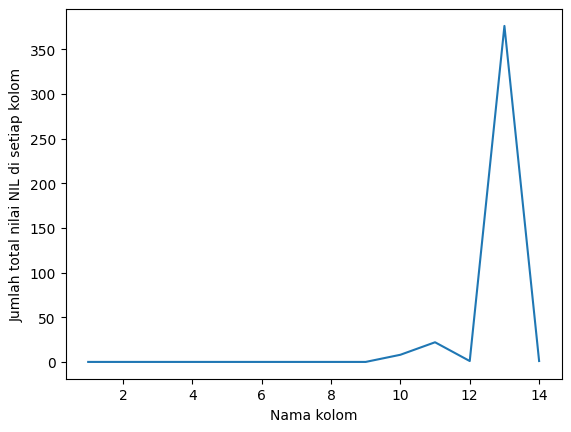

In [14]:
# Mencari nilai NIL dengan memperkecil jangkauan berdasarkan tabel sebelumnya
pd.isnull(df).sum()[1:15].plot(kind="line")
lib.xlabel('Nama kolom')
lib.ylabel('Jumlah total nilai NIL di setiap kolom')

In [15]:
# Menghapus kolom 13, karena terdapat NIl
df.drop(columns = 13, inplace=True)

In [16]:
# Membuat salinan dataset untuk menghindari perubahan dataset asli (ketika Imputasi)
dfBaru = df.copy()

In [17]:
# make new columns indicating what will be imputed
kolomNIL = (kolom for kolom in dfBaru.columns if dfBaru[kolom].isnull().any())
for kolom in kolomNIL:
    dfBaru[kolom] = dfBaru[kolom].isnull()

In [18]:
imputer = SimpleImputer()
dfBaru = pd.DataFrame(imputer.fit_transform(dfBaru))
dfBaru.columns = df.columns

In [19]:
dfBaru.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [20]:
pd.isnull(dfBaru).sum().sum()

0

**Membuat dataset final untuk diolah**

In [21]:
# Membuat nama kolom baru

namaKolomFinalDF = ["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [22]:
#Adding Column names to dataset

dfBaru.columns = namaKolomFinalDF
dfBaru.to_csv("new data with target databaru.csv")
dfBaru.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [23]:
target = dfBaru["class"]

dfFinalAkhir = dfBaru.drop(columns ="class")

In [24]:
dfFinalAkhir.shape

(452, 278)

In [25]:
print(dfBaru)

      Age  Sex  Height  Weight  QRS_Dur  P-R_Int  Q-T_Int  T_Int  P_Int   QRS  \
0    75.0  0.0   190.0    80.0     91.0    193.0    371.0  174.0  121.0 -16.0   
1    56.0  1.0   165.0    64.0     81.0    174.0    401.0  149.0   39.0  25.0   
2    54.0  0.0   172.0    95.0    138.0    163.0    386.0  185.0  102.0  96.0   
3    55.0  0.0   175.0    94.0    100.0    202.0    380.0  179.0  143.0  28.0   
4    75.0  0.0   190.0    80.0     88.0    181.0    360.0  177.0  103.0 -16.0   
..    ...  ...     ...     ...      ...      ...      ...    ...    ...   ...   
447  53.0  1.0   160.0    70.0     80.0    199.0    382.0  154.0  117.0 -37.0   
448  37.0  0.0   190.0    85.0    100.0    137.0    361.0  201.0   73.0  86.0   
449  36.0  0.0   166.0    68.0    108.0    176.0    365.0  194.0  116.0 -85.0   
450  32.0  1.0   155.0    55.0     93.0    106.0    386.0  218.0   63.0  54.0   
451  78.0  1.0   160.0    70.0     79.0    127.0    364.0  138.0   78.0  28.0   

     ...  V6271  V6272  V62



#**2.   Exploratory Data Analysis (EDA)**


In [26]:
dfBaru.describe()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [27]:
dfBaru.corr()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
Age,1.000000,-0.059042,-0.109458,0.381555,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,...,0.164816,-0.158009,0.082376,0.090413,NaN,-0.037877,-0.271504,0.018043,-0.199728,-0.092381
Sex,-0.059042,1.000000,-0.124685,-0.248104,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,...,0.230938,-0.042638,0.092879,0.027401,NaN,0.014210,0.065684,0.031688,0.046605,-0.178080
Height,-0.109458,-0.124685,1.000000,-0.074957,-0.006329,0.013601,-0.237314,-0.038411,0.029025,0.061539,...,-0.018876,-0.073439,-0.091361,-0.002545,NaN,0.067670,-0.008471,-0.090370,-0.092235,0.006648
Weight,0.381555,-0.248104,-0.074957,1.000000,0.100094,0.119826,0.118657,0.149987,0.120668,-0.173355,...,0.050471,-0.026926,0.051946,0.047448,NaN,-0.046278,-0.144721,0.062285,-0.050682,-0.090151
QRS_Dur,-0.004032,-0.337101,-0.006329,0.100094,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,...,-0.198941,0.091384,-0.228688,-0.013697,NaN,-0.065596,-0.222170,0.129796,-0.082791,0.323879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V6276,-0.037877,0.014210,0.067670,-0.046278,-0.065596,0.143272,-0.034971,0.049175,0.248092,0.082009,...,-0.085446,-0.008013,-0.092069,-0.019946,NaN,1.000000,-0.043307,-0.069852,-0.064171,-0.086427
V6277,-0.271504,0.065684,-0.008471,-0.144721,-0.222170,0.061160,-0.038884,-0.184846,0.016054,0.063300,...,0.116959,0.093749,-0.072408,-0.017690,NaN,-0.043307,1.000000,-0.124004,0.687877,-0.030798
V6278,0.018043,0.031688,-0.090370,0.062285,0.129796,-0.027691,0.256200,0.130202,-0.016365,0.297780,...,0.002630,0.671383,0.562825,-0.051131,NaN,-0.069852,-0.124004,1.000000,0.611219,0.003476
V6279,-0.199728,0.046605,-0.092235,-0.050682,-0.082791,0.021048,0.150979,-0.014430,0.004283,0.255203,...,0.082538,0.560374,0.341484,-0.049667,NaN,-0.064171,0.687877,0.611219,1.000000,-0.009275


In [28]:
dfBaru['class'].value_counts()

1.0     245
10.0     50
2.0      44
6.0      25
16.0     22
3.0      15
4.0      15
5.0      13
9.0       9
15.0      5
14.0      4
7.0       3
8.0       2
Name: class, dtype: int64

Text(0.5, 1.0, 'Scatter Plot: Berat badan dan Detak jantung')

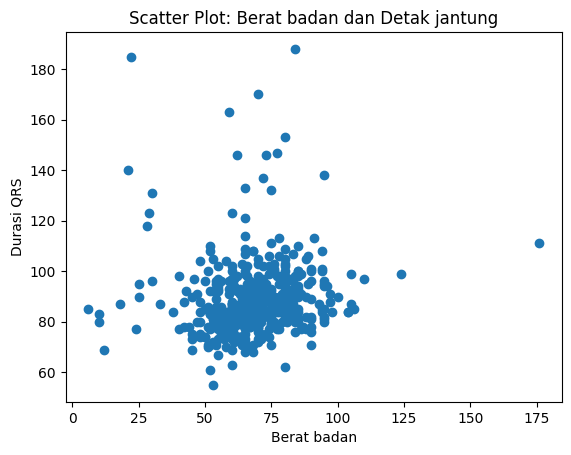

In [29]:
lib.scatter(dfBaru['Weight'], dfBaru['QRS_Dur'])
# Menambahkan label sumbu x dan y
lib.xlabel('Berat badan')
lib.ylabel('Durasi QRS')
# Menambahkan judul plot
lib.title('Scatter Plot: Berat badan dan Detak jantung')

Text(0.5, 1.0, 'Distribusi persebaran gelombang QRS')

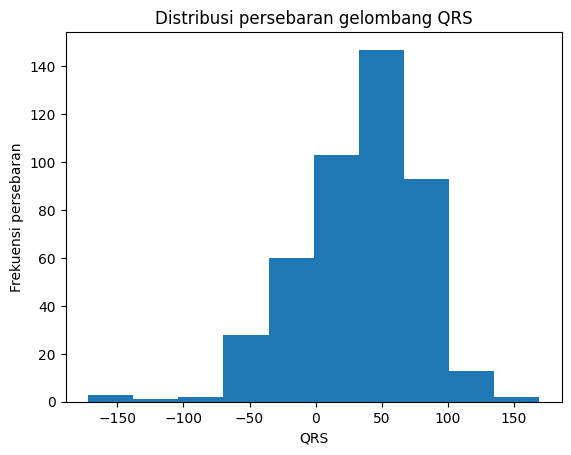

In [30]:
# Menampilkan histogram
lib.hist(dfBaru['QRS'], bins=10)
lib.xlabel('QRS')
lib.ylabel('Frekuensi persebaran')
lib.title('Distribusi persebaran gelombang QRS')

feature scalling dan pemisahan dataset

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(dfFinalAkhir, target ,test_size=0.15, random_state=1)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [34]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# importing evaluation metrices.

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc

#**3.   Modelling**


**Membuat variabel untuk menampung nilai akhir**

In [36]:
hasilAkhir = pd.DataFrame(columns=['Model','Akurasi Training','Akurasi Tes'])

**Algoritma K-Nearest Neighbor dan melakukan perhitungan pelatihan dan pengujian**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))
knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train),average="weighted")
knn_test_recall = recall_score(y_test, knnclassifier.predict(X_test),average="weighted")

print('Skor Training Daya Ingat: {}'
      .format(knn_train_recall))
print('Skor Tes Daya Ingat: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Skor Training Daya Ingat: 0.640625
Skor Tes Daya Ingat: 0.6764705882352942


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [38]:
hasilAkhir = hasilAkhir.append(pd.Series({'Model':'Algoritma K-Nearest Neighbor','Akurasi Training':knn_train_accuracy,'Akurasi Tes':knn_test_accuracy}),ignore_index=True)
hasilAkhir

<ipython-input-38-0cfe1060170b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilAkhir = hasilAkhir.append(pd.Series({'Model':'Algoritma K-Nearest Neighbor','Akurasi Training':knn_train_accuracy,'Akurasi Tes':knn_test_accuracy}),ignore_index=True)


,Model,Akurasi Training,Akurasi Tes
0,Algoritma K-Nearest Neighbor,0.640625,0.676471


**Algoritma Decision Tree dan melakukan perhitungan pelatihan dan pengujian**

In [39]:
from sklearn.tree import DecisionTreeClassifier 
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train) 
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

dt_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)

print('Skor Training Daya Ingat: {}'
      .format(dt_train_recall))
print('Skor Tes Daya Ingat: {}'
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Skor Training Daya Ingat: 0.7838541666666666
Skor Tes Daya Ingat: 0.6617647058823529


array([[35,  2,  1,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 4,  3,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  4,  0,  1],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [40]:
hasilAkhir = hasilAkhir.append(pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}),ignore_index=True)
hasilAkhir

<ipython-input-40-69c46c7a869b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasilAkhir = hasilAkhir.append(pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}),ignore_index=True)


,Model,Akurasi Training,Akurasi Tes,Train Accuracy,Test Accuracy
0,Algoritma K-Nearest Neighbor,0.640625,0.676471,NaN,NaN
1,Decision Tree Classifier,NaN,NaN,0.783854,0.661765
